In [1]:
import sys
sys.path.append('C:\\0_Academy\\VScode\\00_Function\\')
import datetime
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pydotplus as pydot
import statsmodels.api as sm
from reliability.Fitters import Fit_Weibull_Mixture
from reliability.Fitters import Fit_Weibull_2P,Fit_Weibull_3P,Fit_Gamma_2P,Fit_Gamma_3P,Fit_Lognormal_2P
from reliability.Distributions import Weibull_Distribution,Gamma_Distribution,Lognormal_Distribution
from sklearn import mixture

# Read Data

In [4]:
from A1_read_data import read_csv_data
#read data

data02 = read_csv_data(folder,file_name)
scale = 5
file_name = 'WS95_{}min_avg.csv'.format(scale)
data05 = read_csv_data(folder,file_name)
scale = 10
file_name = 'WS95_{}min_avg.csv'.format(scale)
data10 = read_csv_data(folder,file_name)
scale = 15
file_name = 'WS95_{}min_avg.csv'.format(scale)
data15 = read_csv_data(folder,file_name)
scale = 30
file_name = 'WS95_{}min_avg.csv'.format(scale)
data30 = read_csv_data(folder,file_name)
scale = 60
file_name = 'WS95_{}min_avg.csv'.format(scale)
data60 = read_csv_data(folder,file_name)

Import 'WS95_2min_avg.csv'Done
Import 'WS95_5min_avg.csv'Done
Import 'WS95_10min_avg.csv'Done
Import 'WS95_15min_avg.csv'Done
Import 'WS95_30min_avg.csv'Done
Import 'WS95_60min_avg.csv'Done


In [13]:
def READ(scale):
    folder = '1.1 ALL windspeed/'
    file_name = 'WS95_{}min_avg.csv'.format(scale)
    data  = read_csv_data(folder,file_name)
    year = 2019
    data01 = data[['DateTime','WS95']].copy()
    data01['dS'] = data['WS95']-data['WS95'].shift(1)
    data01.dropna(how='any',inplace=True)
    logicY = (data01["DateTime"].apply(lambda x: x.year)==(year))
    data01 = data01[logicY].copy()
    data01.reset_index(inplace=True,drop=True)
    return data01

In [14]:
scales = [2,5,10,15,30,60]
df02 = READ(2)
df05 = READ(5)
df10 = READ(10)
df15 = READ(15)
df30 = READ(30)
df60 = READ(60)

Import 'WS95_2min_avg.csv'Done
Import 'WS95_5min_avg.csv'Done
Import 'WS95_10min_avg.csv'Done
Import 'WS95_15min_avg.csv'Done
Import 'WS95_30min_avg.csv'Done
Import 'WS95_60min_avg.csv'Done


In [38]:
df02['dS'].describe()

count    2.627980e+05
mean     6.071166e-07
std      5.674554e-01
min     -6.673333e+00
25%     -2.370000e-01
50%     -5.166667e-03
75%      2.301667e-01
max      9.339917e+00
Name: dS, dtype: float64

In [39]:
df05['dS'].describe()

count    105120.000000
mean         -0.000004
std           0.531733
min          -5.555367
25%          -0.258667
50%          -0.004533
75%           0.250442
max          10.347133
Name: dS, dtype: float64

In [40]:
df10['dS'].describe()

count    5.256000e+04
mean    -9.671487e-08
std      5.677555e-01
min     -6.746400e+00
25%     -2.969000e-01
50%     -7.875000e-03
75%      2.859333e-01
max      8.314950e+00
Name: dS, dtype: float64

In [36]:
def sns_plot(sig,labels):
    sns.distplot(sig,bins=30,norm_hist=True,label=labels, 
                 hist_kws=dict(alpha=0.9, histtype='step', linewidth=5),
                 kde=False,hist=True,ax=ax)


Text(0.5, 1.0, 'Annually Histogram (2017~2019)')

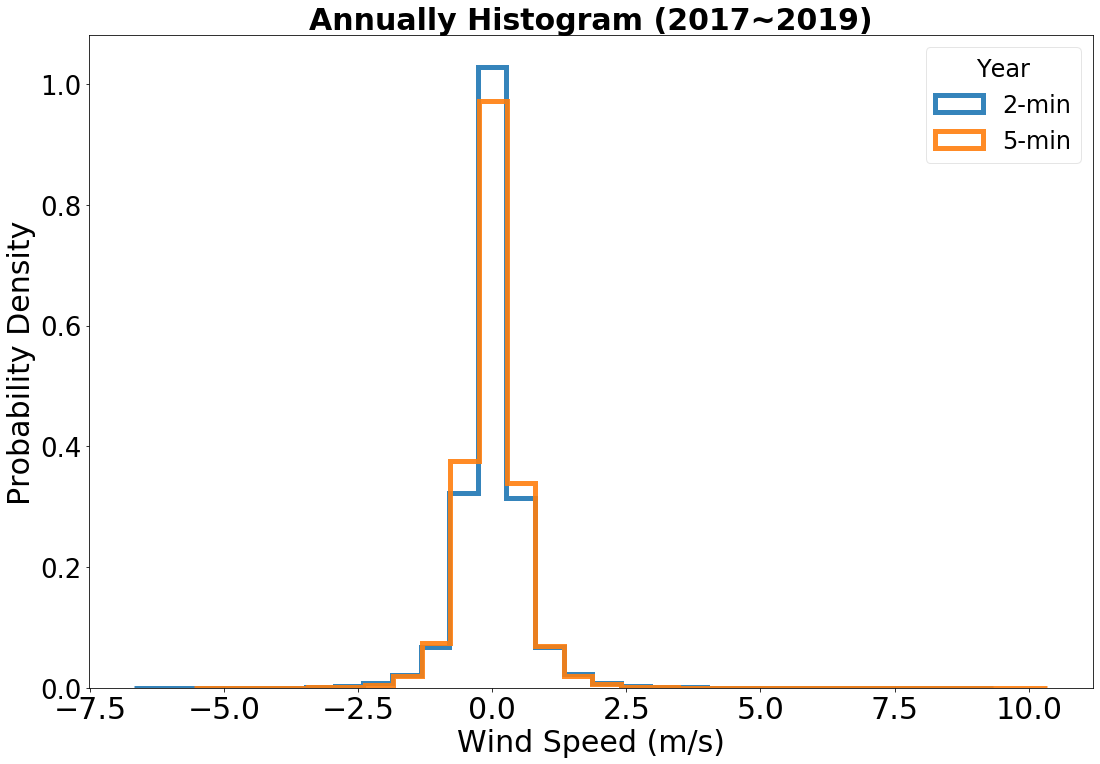

In [37]:
# Annually Histogram
#color = ['maroon','darkgreen','navy']
fig, ax = plt.subplots(1,1, figsize=(18,12), gridspec_kw = {'wspace':0, 'hspace':0})
sns_plot(df02['dS'],'2-min')
sns_plot(df05['dS'],'5-min')
#sns_plot(df10['dS'],'10-min')
#sns_plot(df15['dS'],'15-min')
#sns_plot(df30['dS'],'30-min')
#sns_plot(df60['dS'],'60-min')
#ax.set_ylim(0,0.01)
#ax.set_xlim(0,10)
#ax.set_xticks([0,5,10])
ax.set_xlabel("Wind Speed (m/s)",fontsize=30)
ax.set_ylabel("Probability Density",fontsize=30)
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=26)
ax.legend(loc=1,title="Year",title_fontsize=24,fontsize=24,fancybox=True, framealpha=0.5)
ax.set_title('Annually Histogram (2017~2019)',fontweight='bold',size=30)